<h1>Extracting Stock Data Using a Python Library</h1>


In [3]:
!pip install yfinance
!pip install pandas
!pip install matplotlib

In [4]:
import yfinance as yf

<h3>Using the yfinance Library to Extract Stock Data</h3>

Using the `Ticker` module we can create an object that will allow us to access functions to extract data. 
To do this we need to provide the ticker symbol for the stock.
Here the company is Fortinet and the ticker symbol is `FTNT`.


In [5]:
fortinet = yf.Ticker('FTNT')

In [6]:
fortinet

yfinance.Ticker object <FTNT>

Now we can access functions and variables to extract the type of data we need. 

In [7]:
info = fortinet.info
info

{'address1': '909 Kifer Road',
 'city': 'Sunnyvale',
 'state': 'CA',
 'zip': '94086',
 'country': 'United States',
 'phone': '408-235-7700',
 'fax': '408-235-7737',
 'website': 'https://www.fortinet.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Fortinet, Inc. provides cybersecurity and convergence of networking and security solutions worldwide. It offers secure networking solutions focus on the convergence of networking and security; network firewall solutions that consist of FortiGate data centers, hyperscale, and distributed firewalls, as well as encrypted applications; wireless LAN solutions; and secure connectivity solutions, including FortiSwitch secure ethernet switches, FortiAP wireless local area network access points, FortiExtender 5G connectivity gateways, and other products. The c

In [8]:
import json

In [11]:
# convert the data to json
json.dumps(info)

'{"address1": "909 Kifer Road", "city": "Sunnyvale", "state": "CA", "zip": "94086", "country": "United States", "phone": "408-235-7700", "fax": "408-235-7737", "website": "https://www.fortinet.com", "industry": "Software - Infrastructure", "industryKey": "software-infrastructure", "industryDisp": "Software - Infrastructure", "sector": "Technology", "sectorKey": "technology", "sectorDisp": "Technology", "longBusinessSummary": "Fortinet, Inc. provides cybersecurity and convergence of networking and security solutions worldwide. It offers secure networking solutions focus on the convergence of networking and security; network firewall solutions that consist of FortiGate data centers, hyperscale, and distributed firewalls, as well as encrypted applications; wireless LAN solutions; and secure connectivity solutions, including FortiSwitch secure ethernet switches, FortiAP wireless local area network access points, FortiExtender 5G connectivity gateways, and other products. The company also p

In [12]:
# write data to a json file
with open('result.json', 'w') as fp:
    json.dump(info, fp)

### Stock Info
Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [13]:
with open('result.json') as json_file:
    fortinet_info = json.load(json_file)
    # print the type of data variable    
    print("Type:", type(fortinet_info))

Type: <class 'dict'>


In [14]:
fortinet_info

{'address1': '909 Kifer Road',
 'city': 'Sunnyvale',
 'state': 'CA',
 'zip': '94086',
 'country': 'United States',
 'phone': '408-235-7700',
 'fax': '408-235-7737',
 'website': 'https://www.fortinet.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Fortinet, Inc. provides cybersecurity and convergence of networking and security solutions worldwide. It offers secure networking solutions focus on the convergence of networking and security; network firewall solutions that consist of FortiGate data centers, hyperscale, and distributed firewalls, as well as encrypted applications; wireless LAN solutions; and secure connectivity solutions, including FortiSwitch secure ethernet switches, FortiAP wireless local area network access points, FortiExtender 5G connectivity gateways, and other products. The c

We can get the 'country' using the key country

In [15]:
fortinet_info['country']

'United States'

In [17]:
# get the sector
fortinet_info['sector']

'Technology'

### Extracting Share Price


Using the history() method we can get the share price of the stock over a certain period of time. Using the period parameter we can set how far back from the present to get data. In this case we will get the share price for the whole time (max). Other options are: 1 day (1d), 5d, 1 month (1mo), 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd.

In [18]:
fortinet_share_price_data = fortinet.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [20]:
fortinet_share_price_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-11-18 00:00:00-05:00,1.700000,1.750000,1.633000,1.662000,136704000,0.0,0.0
2009-11-19 00:00:00-05:00,1.657000,1.712000,1.606000,1.689000,22173000,0.0,0.0
2009-11-20 00:00:00-05:00,1.688000,1.696000,1.606000,1.694000,11390000,0.0,0.0
2009-11-23 00:00:00-05:00,1.706000,1.717000,1.660000,1.690000,11858000,0.0,0.0
2009-11-24 00:00:00-05:00,1.680000,1.705000,1.673000,1.701000,4677000,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-09 00:00:00-04:00,68.989998,69.980003,67.970001,69.690002,6988600,0.0,0.0
2024-08-12 00:00:00-04:00,69.800003,71.540001,69.400002,70.360001,6173300,0.0,0.0
2024-08-13 00:00:00-04:00,70.320000,71.589996,69.650002,71.500000,5524300,0.0,0.0


In [22]:
# get the first 5 rows
fortinet_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-11-18 00:00:00-05:00,1.700,1.750,1.633,1.662,136704000,0.0,0.0
2009-11-19 00:00:00-05:00,1.657,1.712,1.606,1.689,22173000,0.0,0.0
2009-11-20 00:00:00-05:00,1.688,1.696,1.606,1.694,11390000,0.0,0.0
2009-11-23 00:00:00-05:00,1.706,1.717,1.660,1.690,11858000,0.0,0.0
2009-11-24 00:00:00-05:00,1.680,1.705,1.673,1.701,4677000,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [23]:
fortinet_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:


<Axes: xlabel='Date'>

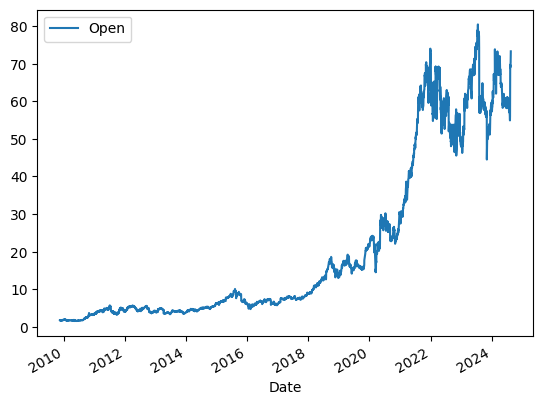

In [24]:
fortinet_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends


Using the variable dividends we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.

In [25]:
fortinet.dividends

Series([], Name: Dividends, dtype: float64)

To plot the dividends overtime we use .plot().  
In this case, the Fortinet company does not have dividends. 


<Axes: xlabel='Date'>

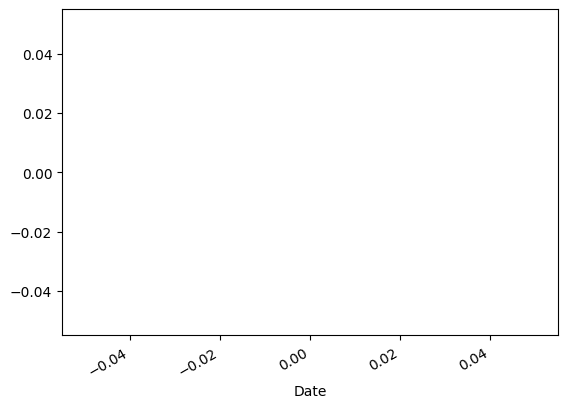

In [26]:
fortinet.dividends.plot()